In [1]:
import sys
import os

import numpy as np
import pandas as pd

#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# configure pd to view all columns and rows in df.head()
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [3]:
pwd

'/home/yiw084/Documents/GitHub/ECE143_Group6'

In [4]:
# raw dataset or unprocessed dataset
data_path = './Data/original_data.csv'
dataset = pd.read_csv(data_path)
## print shape of dataset with rows and columns
print(dataset.shape)
n_sample = dataset.shape[0]
# raw dataset 
dataset.head(10)

(53644, 26)


,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,greV,greQ,userProfileLink,journalPubs,greA,topperCgpa,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,160.0,167.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,8.90,Fall - 2015,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,0,NaN,0.00,Fall - 2013,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,146.0,157.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,3.0,81.00,Fall - 2015,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,NaN,NaN,http://www.edulix.com/unisearch/user.php?uid=1...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,420.0,770.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,2.5,70.00,Fall - 2011,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1
5,abhishek001,MIS,0,0,Information Security Management,273.0,MS,CE,6,0.0,410.0,1010.0,http://www.edulix.com/unisearch/user.php?uid=145,0,600.0,75.00,Fall - 2006,0,Thadomal Shahani Engineering College,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
6,agteakash,MIS,0,0,Business Analytics,104.0,MS,Computer Engineering,27,0.0,150.0,161.0,http://www.edulix.com/unisearch/user.php?uid=2...,0,4.5,77.81,Fall - 2015,0,University of Mumbai,NaN,62.20,NaN,100,NaN,Worcester Polytechnic Institute,1
7,alankarMIS,MIS-management related courses,0,0,NaN,95.0,MS,IT,22,0.0,147.0,156.0,http://www.edulix.com/unisearch/user.php?uid=1...,0,3.0,76.00,Fall - 2012,0,MU,NaN,52.00,NaN,100,NaN,Worcester Polytechnic Institute,1
8,amandeepsharma89,MIS,0,0,NaN,101.0,MS,I.T,24,0.0,490.0,740.0,http://www.edulix.com/unisearch/user.php?uid=6415,0,3.0,74.00,Fall - 2011,0,MU,NaN,64.00,NaN,100,NaN,Worcester Polytechnic Institute,1
9,amatelia3,Computer Science,0,0,NaN,107.0,MS,Information Technology,NaN,0.0,550.0,780.0,http://www.edulix.com/unisearch/user.php?uid=4175,0,4.5,0.00,Fall - 2011,0,K J Somaiya College of Engiineering,NaN,71.40,NaN,100,NaN,Worcester Polytechnic Institute,1


In [5]:
dataset.greA.unique()

array([   4.5 ,     nan,    3.  ,    2.5 ,  600.  ,    3.5 ,    4.  ,
          2.  ,  790.  ,    5.  ,    5.5 ,    6.  ,  660.  ,    4.25,
        170.  ,  161.  ,  800.  , 1330.  ,    0.  , 1230.  ,    7.  ,
         50.  ,    3.3 ,  160.  ,  305.  ,    1.5 ,  770.  ,    3.65,
         29.  ,  164.  ,  710.  ,   13.  ,  166.  ,    4.9 , 1470.  ,
       1100.  , 1120.  ,  296.  ,    3.6 ,    4.4 ,    2.8 ,  163.  ,
        150.  ,  760.  ,   40.  ,    3.51,  303.  ,    8.  ,   57.  ,
          2.2 ,   32.  , 1090.  ,  500.  ,    3.2 ,  630.  , 1420.  ,
        300.  ,  153.  ,  158.  ,  700.  ,  310.  , 1390.  ,    4.2 ,
        350.  ,  151.  ,   22.  ])

### TODO:

1. EDA Numerical features: -> Yifan
    
    
    A. Drop columns
    
    
    B. conversion
    
    
    C. fill NaN
    
2. EDA Categerigal features -> Chis
    
    
    A. Drop columns
    
    
    B. conversion
    
    
    C. fill NaN

3. Feature engineering : 
    
    
    A. trend,
    
    
    B. cov,
    
    
    C. corrlation

4. Machine learning:
    
    
    A. Modelling
    
    
    B. Feature selection
    
    
    C. 

### Numerical Variables

In [6]:
# check if dataset is balanced

# balanced 52% vs 48%
accept = len(dataset[dataset['admit']==1])
print("postive examples:", accept, round(accept/n_sample,4),)
reject = len(dataset[dataset['admit']==0])
print("negative examples:", reject, round(reject/n_sample,4))
# no missing value in target variable "admit"
print((accept+reject)/n_sample)

postive examples: 27955 0.5211
negative examples: 25689 0.4789
1.0


In [7]:
# going to drop "userName, major, specialization, department
#                toeflEssay, userProfileLink, greA, ugCollege, gmatA, gmatQ, gmatV,"

# check num of missing Value in each columns
print(dataset.isnull().sum())

userName               0
major                387
researchExp            0
industryExp            0
specialization     21695
toeflScore          4414
program              322
department             1
toeflEssay         41770
internExp             14
greV                1256
greQ                1220
userProfileLink        0
journalPubs          322
greA                2858
topperCgpa             3
termAndYear          322
confPubs             322
ugCollege           2278
gmatA              53525
cgpa                   0
gmatQ              53521
cgpaScale              0
gmatV              53530
univName               0
admit                  0
dtype: int64


In [8]:
# drop columns
dataset = dataset.drop(["userName","userProfileLink",
                        "major","specialization",
                        "program","department",
                        "toeflEssay","greA",
                       "gmatA","gmatQ","gmatV", "ugCollege",], axis=1)
dataset.head()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,journalPubs,topperCgpa,termAndYear,confPubs,cgpa,cgpaScale,univName,admit
0,0,18,112.0,5.0,160.0,167.0,0,8.9,Fall - 2015,0,8.50,10,Worcester Polytechnic Institute,1
1,0,0,NaN,0.0,NaN,NaN,0,0.0,Fall - 2013,0,0.00,0,Worcester Polytechnic Institute,1
2,0,66,94.0,0.0,146.0,157.0,0,81.0,Fall - 2015,0,78.28,100,Worcester Polytechnic Institute,1
3,0,0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.00,0,Worcester Polytechnic Institute,1
4,0,0,81.0,0.0,420.0,770.0,0,70.0,Fall - 2011,0,57.00,100,Worcester Polytechnic Institute,1


In [9]:
zerogpa = dataset[dataset.cgpa==0]
zerogpa.shape

(2312, 14)

In [10]:
termAndYears = dataset['termAndYear']
# dataset.drop(['termAndYear'])
dataset['year'] = [int(term.split(' - ')[1]) if isinstance(term, str) and len(term.split(' - '))==2 else np.nan for term in termAndYears]
dataset = dataset.drop(["termAndYear"], axis=1)
dataset.head(10)

,researchExp,industryExp,toeflScore,internExp,greV,greQ,journalPubs,topperCgpa,confPubs,cgpa,cgpaScale,univName,admit,year
0,0,18,112.0,5.0,160.0,167.0,0,8.90,0,8.50,10,Worcester Polytechnic Institute,1,2015.0
1,0,0,NaN,0.0,NaN,NaN,0,0.00,0,0.00,0,Worcester Polytechnic Institute,1,2013.0
2,0,66,94.0,0.0,146.0,157.0,0,81.00,0,78.28,100,Worcester Polytechnic Institute,1,2015.0
3,0,0,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0,Worcester Polytechnic Institute,1,NaN
4,0,0,81.0,0.0,420.0,770.0,0,70.00,0,57.00,100,Worcester Polytechnic Institute,1,2011.0
5,0,0,273.0,0.0,410.0,1010.0,0,75.00,0,52.00,100,Worcester Polytechnic Institute,1,2006.0
6,0,0,104.0,0.0,150.0,161.0,0,77.81,0,62.20,100,Worcester Polytechnic Institute,1,2015.0
7,0,0,95.0,0.0,147.0,156.0,0,76.00,0,52.00,100,Worcester Polytechnic Institute,1,2012.0
8,0,0,101.0,0.0,490.0,740.0,0,74.00,0,64.00,100,Worcester Polytechnic Institute,1,2011.0
9,0,0,107.0,0.0,550.0,780.0,0,0.00,0,71.40,100,Worcester Polytechnic Institute,1,2011.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   researchExp  53644 non-null  int64  
 1   industryExp  53644 non-null  int64  
 2   toeflScore   49230 non-null  float64
 3   internExp    53630 non-null  float64
 4   greV         52388 non-null  float64
 5   greQ         52424 non-null  float64
 6   journalPubs  53322 non-null  object 
 7   topperCgpa   53641 non-null  float64
 8   confPubs     53322 non-null  object 
 9   cgpa         53644 non-null  float64
 10  cgpaScale    53644 non-null  int64  
 11  univName     53644 non-null  object 
 12  admit        53644 non-null  int64  
 13  year         52187 non-null  float64
dtypes: float64(7), int64(4), object(3)
memory usage: 5.7+ MB


In [12]:
#from bs4 import BeautifulSoup
import requests
import json

renamedUnis = {'Virginia Tech': 'Virginia Polytechnic Institute and State University',
               'University of Wisconsin--Madison': 'University of Wisconsin Madison',
               'Texas A&M University College Station': 'Texas A and M University College Station',
               'Stony Brook University SUNY': 'SUNY Stony Brook',
               'University at Buffalo SUNY': 'SUNY Buffalo',
               'Rutgers, The State University of New Jersey New Brunswick': 'Rutgers University New Brunswick/Piscataway',
               'Purdue University West Lafayette': 'Purdue University',
               'Ohio State University': 'Ohio State University Columbus'
              }

def get_rankings(amount, printList = False):
    rankings = []
    headers = {
#               'cookie': 'usn_visitor_id=35457b6893350000b5aec15fd102000000240200; akacd_www=2177452799~rv=22~id=2aa01b40a269ff0bd261ac5bcbd75052; usprivacy=1YNY; ak_bmsc=E97593BB60B1794D240142486553199217257F5C944C0000741D2B60CEAE4B13~plnHnHEqptiJ7AFDdYkszIX14JdHid4BJkc5vWiRL06JN34LvMlDdnvmy3FKAjCqTHcHyOlkz2zxt/aP0opU6bQHdSd3GDfCJeCp8j/01PBJoV9uMa9qeMM5bSxfirsijaXuBwtbmleqATfmqVwfVmzLomXXMtp6CXmB4Rh+DcXez902s4whqSS3XIPlHs6MvqjPvzLEerPIOFOi2uUDZY4/1ZPo++DCLnQApt2XU2yxM=; usn_session_id=1343832430198678; cogv=education; bm_mi=3EB32CFEE64AEDD6FF7EDE3BA4C20F68~W40CmE+qgOcl5uK6gAM6WnTR8m3tX5qrBQJ6425kiZ6CmJ2tZh1XtSGBX0D5OmY3lq0PU+tiZKryaRCheT4a/Lad+UxN1lue5l7LqMPS+TN8khJPRMlWh0Jh957/SBvqx7zdRqj8B/d3R0+Wc39gBQn772beLCRM7gHK+2m4+bjhqdnuSVufp+/G+8714L4CLUn9tIw1XnJGV6vIbPH1KE0zJBuqb0weq51GKtgYfVQOg/e+DWnLQcf8RSW5gDYNY+Ul72Zh3ZR4xqdVADrJFQM1qIbs5WbprRrxWY7oV+8=; bm_sv=8881F6170DBF02EC1E8780ED0CEEA3F8~dVDd/JEhW4uA+Lx2KyCo3dp0nifuVR8klpkiC6ZzJPHhFLr2wEjbT939r1gLfmBmlZRnTM58Z8NHkmUzz2bZWjqtHq+Nbgh1y/WIVWebSrff1ZdwNXDCtJhOLTnKbI7GorV0IqF4PmkRqhA4aqo/OHxeLdXzhkfbPH5Nek6nv1E=; edu-page-views=6; modal-page-views=2',
              'authority': 'www.usnews.com',
              'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.150 Safari/537.36',
              }
    iter = 1
    page = 1
    while(amount>0):        
        resp = requests.get('https://www.usnews.com/best-graduate-schools/api/search?program=top-engineering-schools&specialty=eng&_page='+str(page), headers=headers)
        page += 1
        for item in json.loads(resp.text)['data']['items']:
            if (amount > 0):
                uni = item['name'].split(' (')[0].replace('--', ' ')
                if uni in renamedUnis:
                    uni = renamedUnis[uni]
                if printList: print('{}. {}'.format(iter, uni))
                rankings.append(uni)
                iter += 1
                amount -= 1
            else:
                break
    
    return rankings

rankings = get_rankings(218, True)
notFoundTargets = []
print()
for target in dataset['univName']:
    if target not in rankings and target not in notFoundTargets:
        notFoundTargets.append(target)
        
sorter = dict(zip(rankings, range(1, len(rankings)+1)))
dataset['targetRank'] = dataset['univName'].map(sorter)
dataset.sort_values(by='targetRank', ascending=True)
dataset.head(20)

1. Massachusetts Institute of Technology
2. Stanford University
3. University of California Berkeley
4. California Institute of Technology
5. Carnegie Mellon University
6. University of Michigan Ann Arbor
7. Purdue University
8. Georgia Institute of Technology
9. University of California San Diego
10. University of Illinois Urbana-Champaign
11. University of Southern California
12. University of Texas Austin
13. Texas A and M University College Station
14. Columbia University
15. Cornell University
16. University of California Los Angeles
17. Johns Hopkins University
18. University of Pennsylvania
19. Northwestern University
20. University of Maryland College Park
21. Princeton University
22. Harvard University
23. Duke University
24. North Carolina State University
25. University of Washington
26. University of Wisconsin Madison
27. University of California Santa Barbara
28. University of Colorado Boulder
29. Virginia Polytechnic Institute and State University
30. Ohio State Universit

,researchExp,industryExp,toeflScore,internExp,greV,greQ,journalPubs,topperCgpa,confPubs,cgpa,cgpaScale,univName,admit,year,targetRank
0,0,18,112.0,5.0,160.0,167.0,0,8.90,0,8.50,10,Worcester Polytechnic Institute,1,2015.0,91
1,0,0,NaN,0.0,NaN,NaN,0,0.00,0,0.00,0,Worcester Polytechnic Institute,1,2013.0,91
2,0,66,94.0,0.0,146.0,157.0,0,81.00,0,78.28,100,Worcester Polytechnic Institute,1,2015.0,91
3,0,0,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0,Worcester Polytechnic Institute,1,NaN,91
4,0,0,81.0,0.0,420.0,770.0,0,70.00,0,57.00,100,Worcester Polytechnic Institute,1,2011.0,91
5,0,0,273.0,0.0,410.0,1010.0,0,75.00,0,52.00,100,Worcester Polytechnic Institute,1,2006.0,91
6,0,0,104.0,0.0,150.0,161.0,0,77.81,0,62.20,100,Worcester Polytechnic Institute,1,2015.0,91
7,0,0,95.0,0.0,147.0,156.0,0,76.00,0,52.00,100,Worcester Polytechnic Institute,1,2012.0,91
8,0,0,101.0,0.0,490.0,740.0,0,74.00,0,64.00,100,Worcester Polytechnic Institute,1,2011.0,91
9,0,0,107.0,0.0,550.0,780.0,0,0.00,0,71.40,100,Worcester Polytechnic Institute,1,2011.0,91


In [13]:
# GRE score conversion table
score_table = pd.read_csv('./Data/score.csv')
score_table.set_index(['old'],inplace=True)
score_table.head()

,newQ,newV
old,,
800,166,170
790,164,170
780,163,170
770,161,170
760,160,170


In [14]:
def greConversion(dataset, feature):
    '''
    covert old GRE socre ot new GRE scroe
    '''
    gre_score = list(dataset[feature])
    for i in range(len(gre_score)):
        if gre_score[i] > 170:
            try:
                if feature =='greV':
                    gre_score[i]=score_table['newV'][gre_score[i]]
                elif feature == 'greQ':
                    gre_score[i]=score_table['newQ'][gre_score[i]]
            except:
                continue
    
    return gre_score

In [15]:
# perform greConversion
dataset['greV'] = greConversion(dataset, 'greV')
dataset['greQ'] = greConversion(dataset, 'greQ')

In [16]:
# view dataset afer greConversion 
#dataset.head(5)

In [17]:
# sanity check. we are not remove too many samples
a = dataset[dataset['greV'] > 170]
b = dataset[dataset['greQ'] > 170]
print("num of abnormal score of greV", len(a))
print("num of abnormal score of greQ", len(b))

num of abnormal score of greV 9
num of abnormal score of greQ 190


In [18]:
# Filter out candidates with greV or greQ > 170 after gre_Conversion
dataset = dataset[(dataset['greV'] <= 170) & (dataset['greV'] >= 130)]
dataset = dataset[(dataset['greQ'] <= 170) & (dataset['greQ'] >= 130)]
print(dataset.shape)
print("remain data percentage:",dataset.shape[0]/n_sample)

(51598, 15)
remain data percentage: 0.9618596674371784


In [19]:
dataset['greQ'].describe()

count    51598.000000
mean       162.362223
std          4.262739
min        136.000000
25%        160.000000
50%        163.000000
75%        166.000000
max        170.000000
Name: greQ, dtype: float64

In [20]:
##################################################################################################################

In [21]:
def cgpa_conversion(dataset, cgpa="cgpa", cgpaScale="topperCgpa"):
    '''
    convert cgpa wrt topperCgpa
    :return: cgpa
    :type list
    '''
    cgpa = dataset[cgpa].tolist()
    cgpaScale = dataset[cgpaScale].tolist()
    for i in range(len(cgpa)):
        if cgpaScale[i] != 0 and cgpaScale[i] is not np.nan: 
            cgpa[i] = cgpa[i]/ cgpaScale[i]
            # Ratio should <=1, otherwise set to nan
            if cgpa[i] >1:
                cgpa[i]= np.nan
            elif cgpa[i]==0:
                cgpa[i]= np.nan
                
        else:
            cgpa[i]= np.nan
            
    return cgpa

In [22]:
dataset['cgpaRatio'] = cgpa_conversion(dataset, cgpa="cgpa", cgpaScale="topperCgpa")

# drop cgpa and topperCgpa using cgpaRatio instead
dataset = dataset.drop(['cgpa','topperCgpa','cgpaScale'],axis =1)

In [23]:
print(len(dataset))
# percent of data remain after filter gre and cgpu.
# Note we do not drop any value during cgpa_conversion
print(len(dataset)/n_sample)
#dataset.head()

51598
0.9618596674371784


In [24]:
# Deal with journalPubs
dataset.journalPubs.unique()

array(['0', '2', '7', '1', '3', '4', '5', '12', '6'], dtype=object)

In [25]:
# element in dataset['journalPubs'] has different type
dataset['journalPubs'] = dataset['journalPubs'].astype(str)
for i, element, in enumerate(dataset['journalPubs']):
    #print(type(element))
    #print(i)
    if len(element)>3:
        dataset['journalPubs'].iloc[i] = 0


In [26]:
# convert to int64
dataset['journalPubs'] = dataset['journalPubs'].astype('int64') 
dataset.journalPubs.unique()

array([ 0,  2,  7,  1,  3,  4,  5, 12,  6])

In [27]:
#############################################################################################################

In [28]:
# Deal with confPubs
dataset.confPubs.unique()

array(['0', '2', '3', '1', '4', '5', '8', '6', '15'], dtype=object)

In [29]:
dataset['confPubs'] = dataset['confPubs'].astype(str)
for i, element, in enumerate(dataset['confPubs']):
    
    if len(str(element))>3:
        dataset['confPubs'].iloc[i] = 0

In [30]:
# convert to int64
dataset['confPubs'] = dataset['confPubs'].astype('int64')
dataset.confPubs.unique()

array([ 0,  2,  3,  1,  4,  5,  8,  6, 15])

In [31]:
#############################################################################################################

In [32]:
# Deal with confPubs
dataset.toeflScore.unique()

array([ 112.,   94.,   81.,  104.,   95.,  101.,  107.,   99.,   91.,
         96.,   98.,  111.,  105.,  108.,  109.,  114.,   nan,  115.,
         93.,  103.,  110.,   86.,  117.,   85.,  113.,  102.,  106.,
         89.,   97.,   90.,   84.,   92.,   79.,   87.,  100.,   82.,
        237.,  257.,    0.,   88.,   76.,   80., 1040.,   78.,    8.,
         83.,  273.,    7.,  119.,  116.,  277.,  270.,    6.,  287.,
        280.,  267.,  275.,  118.,  120.,  297.,  263.,  290.,    4.,
        620.,  283.,  293.,  300.,   57.,  260.,   65., 1190.,  233.,
         11.,  170., 1004., 1250.,  306.,  313.,  312.,   21.,  223.,
        643.,    9.,   66.,  253.,   77.,  250.,  256.,  322.,  326.,
       1210., 1200.,  124., 1070.,  240.,   75.,  247., 1350.,  243.,
        230.,   70.,   74.,   10.,  310.,  308.,  587.,   73.,  307.])

In [33]:
'''
dataset = dataset[dataset['toeflScore']<=677]
print(dataset.shape)
print(len(dataset)/n_sample)
'''
# (48790, 13)
# 0.9095145775855641 

"\ndataset = dataset[dataset['toeflScore']<=677]\nprint(dataset.shape)\nprint(len(dataset)/n_sample)\n"

In [34]:
dataset = dataset.drop(["toeflScore"], axis=1)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51598 entries, 0 to 53643
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   researchExp  51598 non-null  int64  
 1   industryExp  51598 non-null  int64  
 2   internExp    51598 non-null  float64
 3   greV         51598 non-null  float64
 4   greQ         51598 non-null  float64
 5   journalPubs  51598 non-null  int64  
 6   confPubs     51598 non-null  int64  
 7   univName     51598 non-null  object 
 8   admit        51598 non-null  int64  
 9   year         50617 non-null  float64
 10  targetRank   51598 non-null  int64  
 11  cgpaRatio    40379 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 5.1+ MB


In [36]:
print(dataset.isnull().any())
print('\n')
print(dataset.isnull().sum())

researchExp    False
industryExp    False
internExp      False
greV           False
greQ           False
journalPubs    False
confPubs       False
univName       False
admit          False
year            True
targetRank     False
cgpaRatio       True
dtype: bool


researchExp        0
industryExp        0
internExp          0
greV               0
greQ               0
journalPubs        0
confPubs           0
univName           0
admit              0
year             981
targetRank         0
cgpaRatio      11219
dtype: int64


In [37]:
# describe will skip all catagorical feature
dataset.describe()

,researchExp,industryExp,internExp,greV,greQ,journalPubs,confPubs,admit,year,targetRank,cgpaRatio
count,51598.00000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,50617.000000,51598.000000,40379.000000
mean,0.34980,4.111109,0.464378,154.538606,162.362223,0.039750,0.051669,0.512190,2010.226406,41.383503,0.882946
std,2.64098,12.055217,2.520386,6.328465,4.262739,0.290339,0.351702,0.499856,183.480238,29.572493,0.076118
min,0.00000,0.000000,0.000000,130.000000,136.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.046250
25%,0.00000,0.000000,0.000000,150.000000,160.000000,0.000000,0.000000,0.000000,2012.000000,16.000000,0.835294
50%,0.00000,0.000000,0.000000,154.000000,163.000000,0.000000,0.000000,1.000000,2013.000000,32.000000,0.891566
75%,0.00000,0.000000,0.000000,159.000000,166.000000,0.000000,0.000000,1.000000,2014.000000,62.000000,0.940277
max,53.00000,138.000000,96.000000,170.000000,170.000000,12.000000,15.000000,1.000000,20133.000000,150.000000,1.000000


In [38]:
################################################################################################################

### Missing Values in Numerical Features

In [39]:
# make a list of features which has missing values
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']
# print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, '\t\t',np.round(dataset[feature].isnull().mean(), 4) *100, '\t','% missing values')

year 		 1.9 	 % missing values
cgpaRatio 		 21.740000000000002 	 % missing values


In [40]:
dataset["cgpaRatio"].fillna(dataset["cgpaRatio"].mean(),inplace=True)
dataset["internExp"].fillna(dataset["internExp"].mean(),inplace=True)


In [41]:
dataset.describe()

,researchExp,industryExp,internExp,greV,greQ,journalPubs,confPubs,admit,year,targetRank,cgpaRatio
count,51598.00000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,50617.000000,51598.000000,51598.000000
mean,0.34980,4.111109,0.464378,154.538606,162.362223,0.039750,0.051669,0.512190,2010.226406,41.383503,0.882946
std,2.64098,12.055217,2.520386,6.328465,4.262739,0.290339,0.351702,0.499856,183.480238,29.572493,0.067336
min,0.00000,0.000000,0.000000,130.000000,136.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.046250
25%,0.00000,0.000000,0.000000,150.000000,160.000000,0.000000,0.000000,0.000000,2012.000000,16.000000,0.852273
50%,0.00000,0.000000,0.000000,154.000000,163.000000,0.000000,0.000000,1.000000,2013.000000,32.000000,0.882946
75%,0.00000,0.000000,0.000000,159.000000,166.000000,0.000000,0.000000,1.000000,2014.000000,62.000000,0.926316
max,53.00000,138.000000,96.000000,170.000000,170.000000,12.000000,15.000000,1.000000,20133.000000,150.000000,1.000000


In [42]:
print(dataset.shape)
print(dataset.shape[0]/n_sample)
print('\n')
print(dataset.isnull().any())

(51598, 12)
0.9618596674371784


researchExp    False
industryExp    False
internExp      False
greV           False
greQ           False
journalPubs    False
confPubs       False
univName       False
admit          False
year            True
targetRank     False
cgpaRatio      False
dtype: bool


In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51598 entries, 0 to 53643
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   researchExp  51598 non-null  int64  
 1   industryExp  51598 non-null  int64  
 2   internExp    51598 non-null  float64
 3   greV         51598 non-null  float64
 4   greQ         51598 non-null  float64
 5   journalPubs  51598 non-null  int64  
 6   confPubs     51598 non-null  int64  
 7   univName     51598 non-null  object 
 8   admit        51598 non-null  int64  
 9   year         50617 non-null  float64
 10  targetRank   51598 non-null  int64  
 11  cgpaRatio    51598 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 5.1+ MB


In [44]:
dataset.describe()

,researchExp,industryExp,internExp,greV,greQ,journalPubs,confPubs,admit,year,targetRank,cgpaRatio
count,51598.00000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,50617.000000,51598.000000,51598.000000
mean,0.34980,4.111109,0.464378,154.538606,162.362223,0.039750,0.051669,0.512190,2010.226406,41.383503,0.882946
std,2.64098,12.055217,2.520386,6.328465,4.262739,0.290339,0.351702,0.499856,183.480238,29.572493,0.067336
min,0.00000,0.000000,0.000000,130.000000,136.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.046250
25%,0.00000,0.000000,0.000000,150.000000,160.000000,0.000000,0.000000,0.000000,2012.000000,16.000000,0.852273
50%,0.00000,0.000000,0.000000,154.000000,163.000000,0.000000,0.000000,1.000000,2013.000000,32.000000,0.882946
75%,0.00000,0.000000,0.000000,159.000000,166.000000,0.000000,0.000000,1.000000,2014.000000,62.000000,0.926316
max,53.00000,138.000000,96.000000,170.000000,170.000000,12.000000,15.000000,1.000000,20133.000000,150.000000,1.000000


In [45]:
########################################################################################################

### Categorical Features
TODO: you can extract categorical feature 
        with #dataset[feature].dtypes=='O', since I already convert all types for numerical features
    
    convert termAndYear
    drop ugCollege
    convert univName to one-hot encoding (pd.get_dummies can be handy)

In [46]:
# rearrange columns 
dataset = dataset[['cgpaRatio',
                   'greV','greQ',
                   'researchExp', 'industryExp','internExp',
                   'journalPubs','confPubs',
                   'univName',
                   'year', 'targetRank',
                   'admit'
                  ]]
print(dataset.shape)
dataset.head()

(51598, 12)


,cgpaRatio,greV,greQ,researchExp,industryExp,internExp,journalPubs,confPubs,univName,year,targetRank,admit
0,0.955056,160.0,167.0,0,18,5.0,0,0,Worcester Polytechnic Institute,2015.0,91,1
2,0.966420,146.0,157.0,0,66,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1
4,0.814286,148.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1
6,0.799383,150.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1
7,0.684211,147.0,156.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2012.0,91,1


### sanity check

In [47]:
dataset.columns

Index(['cgpaRatio', 'greV', 'greQ', 'researchExp', 'industryExp', 'internExp',
       'journalPubs', 'confPubs', 'univName', 'year', 'targetRank', 'admit'],
      dtype='object')

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51598 entries, 0 to 53643
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cgpaRatio    51598 non-null  float64
 1   greV         51598 non-null  float64
 2   greQ         51598 non-null  float64
 3   researchExp  51598 non-null  int64  
 4   industryExp  51598 non-null  int64  
 5   internExp    51598 non-null  float64
 6   journalPubs  51598 non-null  int64  
 7   confPubs     51598 non-null  int64  
 8   univName     51598 non-null  object 
 9   year         50617 non-null  float64
 10  targetRank   51598 non-null  int64  
 11  admit        51598 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 5.1+ MB


In [49]:
error = dataset[dataset.cgpaRatio<0.1]
print(error.shape[0])
error.head(60)

12


,cgpaRatio,greV,greQ,researchExp,industryExp,internExp,journalPubs,confPubs,univName,year,targetRank,admit
373,0.093953,150.0,165.0,0,0,0.0,0,0,Virginia Polytechnic Institute and State Unive...,2013.0,29,1
2295,0.046250,153.0,157.0,0,0,0.0,0,0,University of Washington,2014.0,25,1
2770,0.046250,153.0,157.0,0,0,0.0,0,0,University of Utah,2014.0,55,1
12599,0.083750,150.0,163.0,0,0,0.0,0,0,University of North Carolina Charlotte,2014.0,138,0
17845,0.046250,153.0,157.0,0,0,0.0,0,0,University of Illinois Chicago,2014.0,78,1
19887,0.048193,152.0,164.0,0,0,0.0,0,0,University of Florida,2012.0,48,1
20713,0.093953,150.0,165.0,0,0,0.0,0,0,University of Florida,2013.0,48,0
27432,0.046250,153.0,157.0,0,0,0.0,0,0,University of Arizona,2014.0,66,0
30042,0.046250,153.0,157.0,0,0,0.0,0,0,Syracuse University,2014.0,76,1
34602,0.083750,150.0,163.0,0,0,0.0,0,0,SUNY Buffalo,2014.0,60,0


In [50]:
# cgpaRatio

num_unique = len(dataset.cgpaRatio.unique()) 

for i in dataset.cgpaRatio.unique():
    assert isinstance(i,float)
    assert 0<i<=1
print(num_unique)
print(dataset.cgpaRatio.unique())

4706
[0.95505618 0.96641975 0.81428571 ... 0.81190476 0.77217949 0.86781609]


In [51]:
# greV
num_unique = len(dataset.greV.unique())
for i in dataset.greV.unique():
    assert isinstance(i,float)
    assert 130<=i<=170
print(num_unique)    
print(sorted(dataset.greV.unique().astype('int16')))

41
[130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [52]:
# greQ
num_unique = len(dataset.greQ.unique())
for i in dataset.greQ.unique():
    assert isinstance(i,float)
    assert 130<=i<=170
print(num_unique)    
print(sorted(dataset.greQ.unique().astype('int16')))

35
[136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [53]:
# researchExp
num_unique = len(dataset.researchExp.unique())
for i in dataset.researchExp.unique():
    assert(isinstance(i,np.int64))
    assert i>=0
print(num_unique)    
print(sorted(dataset.researchExp.unique().astype('int16')))

33
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 24, 26, 29, 30, 32, 34, 36, 37, 42, 48, 53]


In [54]:
# industryExp
num_unique = len(dataset.industryExp.unique())
for i in dataset.industryExp.unique():
    assert(isinstance(i,np.int64))
    assert i>=0
print(num_unique)    
print(sorted(dataset.industryExp.unique().astype('int16')))

96
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 86, 87, 88, 90, 92, 94, 96, 98, 102, 106, 108, 126, 132, 138]


In [55]:
# internExp
num_unique = len(dataset.internExp.unique())
for i in dataset.internExp.unique():
    assert(isinstance(i,np.float64))
    assert i>=0
print(num_unique)    
print(sorted(dataset.internExp.unique().astype('int16')))

26
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 24, 28, 29, 36, 72, 96]


In [56]:
# journalPubs
num_unique = len(dataset.journalPubs.unique())
for i in dataset.journalPubs.unique():
    assert(isinstance(i,np.int64))
    assert i>=0
print(num_unique)    
print(sorted(dataset.journalPubs.unique().astype('int16')))

9
[0, 1, 2, 3, 4, 5, 6, 7, 12]


In [57]:
# confPubs
num_unique = len(dataset.confPubs.unique())
for i in dataset.confPubs.unique():
    assert(isinstance(i,np.int64))
    assert i>=0
print(num_unique)    
print(sorted(dataset.confPubs.unique().astype('int16')))

9
[0, 1, 2, 3, 4, 5, 6, 8, 15]


In [58]:
# targetRank
num_unique = len(dataset.targetRank.unique())
for i in dataset.targetRank.unique():
    assert(isinstance(i,np.int64))
    assert i>=0
print(num_unique)    
print(sorted(dataset.targetRank.unique().astype('int16')))

54
[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 37, 38, 41, 48, 53, 55, 57, 60, 62, 65, 66, 72, 76, 78, 82, 85, 86, 87, 91, 92, 102, 138, 150]


In [59]:
dataset["year"].head()

0    2015.0
2    2015.0
4    2011.0
6    2015.0
7    2012.0
Name: year, dtype: float64

In [60]:
dataset["year"]= dataset['year'][(dataset['year']>1990) & (dataset['year']<2020)]
dataset["year"].head()

0    2015.0
2    2015.0
4    2011.0
6    2015.0
7    2012.0
Name: year, dtype: float64

In [61]:
dataset["year"].fillna(dataset["year"].median(), inplace=True)

In [62]:
# year
num_unique = len(dataset.year.unique())
# for i in dataset.year.unique():
#     assert(isinstance(i,np.int64))
#     assert i>=0
print(num_unique)    
print(dataset.year.unique())

13
[2015. 2011. 2012. 2016. 2014. 2013. 2009. 2008. 2006. 2007. 1992. 2010.
 2005.]


In [63]:
dataset.isnull().any()

cgpaRatio      False
greV           False
greQ           False
researchExp    False
industryExp    False
internExp      False
journalPubs    False
confPubs       False
univName       False
year           False
targetRank     False
admit          False
dtype: bool

In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51598 entries, 0 to 53643
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cgpaRatio    51598 non-null  float64
 1   greV         51598 non-null  float64
 2   greQ         51598 non-null  float64
 3   researchExp  51598 non-null  int64  
 4   industryExp  51598 non-null  int64  
 5   internExp    51598 non-null  float64
 6   journalPubs  51598 non-null  int64  
 7   confPubs     51598 non-null  int64  
 8   univName     51598 non-null  object 
 9   year         51598 non-null  float64
 10  targetRank   51598 non-null  int64  
 11  admit        51598 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 5.1+ MB


In [65]:
dataset.describe()

,cgpaRatio,greV,greQ,researchExp,industryExp,internExp,journalPubs,confPubs,year,targetRank,admit
count,51598.000000,51598.000000,51598.000000,51598.00000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000,51598.000000
mean,0.882946,154.538606,162.362223,0.34980,4.111109,0.464378,0.039750,0.051669,2012.633087,41.383503,0.512190
std,0.067336,6.328465,4.262739,2.64098,12.055217,2.520386,0.290339,0.351702,1.749456,29.572493,0.499856
min,0.046250,130.000000,136.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1992.000000,1.000000,0.000000
25%,0.852273,150.000000,160.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2012.000000,16.000000,0.000000
50%,0.882946,154.000000,163.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2013.000000,32.000000,1.000000
75%,0.926316,159.000000,166.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2014.000000,62.000000,1.000000
max,1.000000,170.000000,170.000000,53.00000,138.000000,96.000000,12.000000,15.000000,2016.000000,150.000000,1.000000


In [66]:
dataset.head()

,cgpaRatio,greV,greQ,researchExp,industryExp,internExp,journalPubs,confPubs,univName,year,targetRank,admit
0,0.955056,160.0,167.0,0,18,5.0,0,0,Worcester Polytechnic Institute,2015.0,91,1
2,0.966420,146.0,157.0,0,66,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1
4,0.814286,148.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2011.0,91,1
6,0.799383,150.0,161.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2015.0,91,1
7,0.684211,147.0,156.0,0,0,0.0,0,0,Worcester Polytechnic Institute,2012.0,91,1


In [67]:
dataset.shape

(51598, 12)

In [68]:
51598/n_sample*100

96.18596674371784

In [69]:
dataset.to_csv('clean_data.csv', index=False)

In [70]:
# Sanity check on each dataset.columns
# Fix cgpratio == 0 -> np.nan fill with median
    # 12 samples kept in dataset[dataset.cgpaRatio<0.5], all of them are below cgpaRatio==0.1 can be drop  
# Remove greV and greQ whose grade less than base grade (130)
# In "split year" change float(Nan) to np.Nan, store year in float instead of str
# Filter out error years and keep year between [1990,2020]
# 96% data preserved
# Output updated clean_data.csv'


In [71]:
########################################################################################################

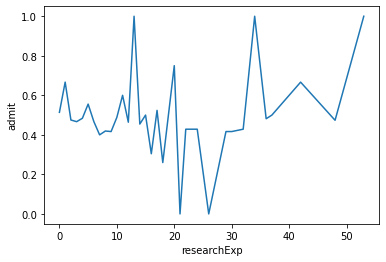

In [72]:
# The following graph is no 100% accurate 
# but can gather some relationship betweem exp and admit
dataset.groupby(['researchExp'])['admit'].mean().plot()
plt.ylabel('admit')
plt.show()

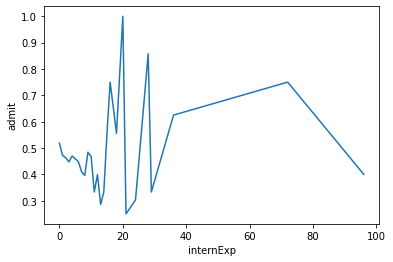

In [73]:
dataset.groupby(['internExp'])['admit'].mean().plot()
plt.ylabel('admit')
plt.show()

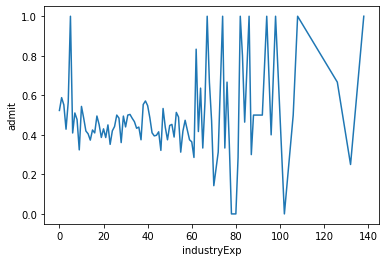

In [74]:
dataset.groupby(['industryExp'])['admit'].mean().plot()
plt.ylabel('admit')
plt.show()

In [75]:
num_res_zeros = (dataset['researchExp']==0).sum()
num_res_nzeros= (dataset['researchExp']!=0).sum()
print('researchExp:',num_res_zeros, num_res_nzeros)
print(len(dataset['researchExp']))
print('\n')

num_intern_zeros = (dataset['internExp']==0).sum()
num_intern_nzeros= (dataset['internExp']!=0).sum()
print('internExp:',num_intern_zeros, num_intern_nzeros)
print(len(dataset['internExp']))
print('\n')

num_industry_zeros = (dataset['industryExp']==0).sum()
num_industry_nzeros= (dataset['industryExp']!=0).sum()
print('industryExp:',num_industry_zeros, num_industry_nzeros)
print(len(dataset['industryExp']))

researchExp: 50067 1531
51598


internExp: 47092 4506
51598


industryExp: 44601 6997
51598
